# MNIST Digit Classification

Richard Corrado <richcorrado@gmail.com> February 2017 (updated 3/11/2017)

For the Fat Cat Fab Lab Machine Learning Meetup

## Purpose

One goal of our Machine Learning meetup is to introduce people to machine learning tools and gain the background needed to start applying those tools to their own projects.  I hope that this notebook can serve as an practical introduction to some of the key issues that tend to be common to any machine learning problem.  

What this notebook does:

1. Introduce the MNIST Digit dataset, a historically important database and benchmark for machine learning techniques, specifically in pattern and image recognition.

2. Introduce pandas, which is the python toolkit that allows importing larget datasets, together with efficient tools for exploring and manipulating those data.

3. Use pandas, numpy and scikit-learn to prepare data for use in scikit-learn machine learning tools.  In particular, we learn how to take data in a pandas dataframe and specify the design matrix and response vector.  We also learn about some of the tools available for splitting a dataset into training and validation sets, which is an important part of the statistical framework used in machine learning.

4. Apply scikit-learn tools to a specific machine learning problem.  We specifically use the Random Forest method on the MNIST digits, but the techniques of Random Search, Grid Search, and Cross-Validation are ones that you will use almost anytime you are applying models to tidy data.

Many issues are not covered:

1. Taking messy data and cleaning it.  The MNIST dataset is already "tidy",  since there are no missing data, or data that have to be reformatted before we can apply scikit-learn functions.  

2. Data visualization and feature engineering.  We incorporate matplotlib to visualize the digits and do a little bit of data exploration, but less than one might expect in other types of datasets.

3. Different types of machine learning algorithms. We only consider Random Forests, but the framework can be applied to linear models, neural networks, etc.

## Overview of the MNIST Digit Dataset

The MNIST digit database is a very popular database for studying machine learning techniques, especially pattern-recognition methods.  There are many reasons for this, but in particular, a large amount of preprocessing has already been done in translating the images to a machine encoding consisting of greyscale pixel values.  Therefore the student/researcher can investigate further preprocessing, but can also directly apply machine learning techniques to a very clean dataset, without any preprocessing.   Furthermore, it is a standardized dataset that allows for comparison of results with published approaches and error rates. 

The dataset, along with a discussion of historical results, with links to publications, are available from the website <http://yann.lecun.com/exdb/mnist/>.  The dataset is also the subject of a kaggle playground competition <https://www.kaggle.com/c/digit-recognizer>.  I would suggest obtaining the data from kaggle, since those files are in csv format and very easy to import into R or python.  The files provided by LeCun are in a format that requires a bit of extra code to import, though others have made csvs available, like <https://pjreddie.com/projects/mnist-in-csv/>.  Using the kaggle dataset will also give an intro to kaggle competitions and datasets that will prove useful in your future machine learning studies.

The original data are split into a training set of 60000 entries, while the test set is around 10000 examples.  Kaggle has resplit this into 42000 training observations and 28000 test entries. Their test set is provided without labels that would indicate which digits appear.   

A typical approach is to split the training set into whatever training and validation subsets are necessary for modeling. Final predictions would then be made on the test set to determine the "official" test error rate for the model.  If using the kaggle submission method,  a subset of the test set would be used to determine an error rate and "public leaderboard ranking."  If you want to obtain the test error over the full dataset, you would need to obtain the test set labels from LeCun or the csv version linked above.
 
From the Kaggle data description: 

>Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

>The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

>Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

>For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

>Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

<code>000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 </code>

>The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

## Exploring the Dataset - Pandas

We'll use various python toolkits in this notebook.  I will try to load these as we need them with a brief explanation, but how to install them on your local machine is beyond the discussion here.  We can use the google group thread <https://groups.google.com/forum/#!topic/fat-cat-kagglers/c4Pv5kYiJzQ> to solve any problems that arise with python/package installation issues.

To start we will load 

- pandas: dataframe data structure based on the one in R, along with vectorized routines for fast manipulation of the data

- numpy: various math tools, especially for constructing and working with multidimensional arrays.

- matplotlib: 2d plotting tools.

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.precision',5)
pd.set_option('display.max_colwidth',100)

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 12, 4
# get_ipython().magic(u'matplotlib inline')
%matplotlib inline

We have included some options to display floats with a bit more precision as well as wider columns in pandas.  We also included a command to ensure that our plots appear inline in the notebook.

The kaggle train and test data files are stored in Comma Separated Values format (CSV). I have saved these files to a subdirectory called input.  We can load the data into pandas dataframes using the command.

In [2]:
train_df = pd.read_csv("./input/train.csv")
test_df = pd.read_csv("./input/test.csv")

For the purposes of this notebook, we'll only be working with the training data.

Pandas has tools to import data from many different sources, including Excel, JSON, SQL. See the <a href="http://pandas.pydata.org/pandas-docs/stable/api.html#input-output">Pandas I/O API</a> for other options. 

We can get a quick look the format of the dataframe.  We use the head command to display only the first 10 lines of the dataframe.  We will touch later on some ways to refer to parts of a dataframe that can be used to restrict the display of very specific parts.

In [3]:
train_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This should be compared with the description of the data given in the quoted text from the kaggle description.  Basically the 28x28 array of pixels has been unrolled into a 784-dimensional vector.  The pandas dataframe object stores this in a format that closely resembles a spreadsheet.  On the far left, there is an index displayed and along the top are the column names that were read in from the first line of the CSV file.

We notice that there are many 0s displayed.  We'll see shortly that this dataset is indeed fairly sparse.

Pandas provides a shape() function that lets us see the dimensions involved:

In [4]:
train_df.shape

(42000, 785)

In [5]:
test_df.shape

(28000, 784)

As mentioned in the overview,  there are 42000 training examples and 28000 examples in the test set.  The train set has an additional column corresponding to the digit label, while the test data consists only of the pixel data.

It is a useful exercise to visualize the digits in python and the pandas, numpy and matplotlib tools make this particularly easy.  We will first use a function to read a row of the train_df dataframe and return a numpy array containing the 28x28 matrix representation of the image:

In [6]:
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = train_df.drop('label', axis=1).iloc[row].values
    # numpy provides the reshape() function to reorganize arrays into specified shapes
    pixel_mat = vec.reshape(28,28)
    return pixel_mat

This function uses a few pandas methods that we'll be using very often and will explain in a bit more detail later. We drop the label column from the dataframe,  index a specified row and then use the values function to convert the dataframe into another data structure called a numpy array.   This numpy array is then reassembled into the 28x28 pixel matrix using the reshape command, and that object is returned by the function.

Let's run this function on a random row.  We'll use the numpy randint function here and below so that you can run the commands various times on different rows.

In [7]:
x = np.random.randint(0,42000)
X = pixel_mat(x)
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

This is the format of a typical numpy array, but it is a bit large to display well in the notebook.  If we drop all of the rows and columns that are all zeros, we can display the nonzero part of the matrix in a fairly compact form:

In [8]:
X = X[~np.all(X == 0, axis=1)]
X = X[:,~np.all(X == 0, axis=0)]
print(X)

[[  0   0   0   0   0   0   0   0   0   0   0  59  77  77  77  77  65   0
    0   0]
 [  0   0   0   0   0   3  63 120 152 230 241 251 254 254 254 254 252 184
    0   0]
 [  0  13  67 151 228 229 254 254 254 254 254 254 254 254 254 254 254 227
    0   0]
 [152 224 254 254 254 254 254 254 254 235 144 128 128 128 130 254 254 183
    0   0]
 [255 254 254 254 244 228 142 118  53  25   0   0   0  44 180 254 228  46
    0   0]
 [183 245 164  81  38   0   0   0   0   0   0   4  44 232 254 252  89   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0  82 208 254 254 254 186  12   0
    0   0]
 [  0   0   0   0   0   0   0   0  37 239 253 254 254 254 254 254 251 178
   90   0]
 [  0   0   0   0   0   0   0   0  79 254 254 254 254 254 254 254 254 254
  253 123]
 [  0   0   0   0   0   0   0   0  59 209 209 171 120 120  89 120 120 181
  254 211]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 213
  254 243]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  56

If you look carefully, you might be able to recognize the digit that's been drawn.  

We can get a better visualization of the digit by using matplotlib. Matplotlib conveniently provides a function to make a 2d plot of the entries of a matrix:

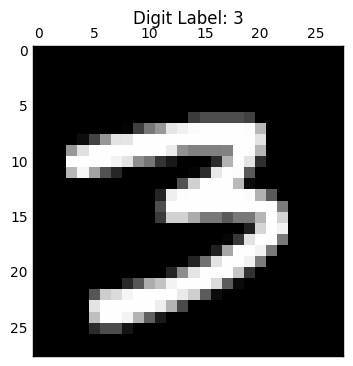

In [9]:
plt.matshow(pixel_mat(x), cmap=plt.cm.gray)
plt.title("Digit Label: %d" % train_df['label'].iloc[x])
plt.show()

Matshow is actually a wrapper for another matplotlib function called imshow that can be used to display other types of images.  In order to display many digits at once, we'll use imshow. 

The code below does the following:

1. Chooses 16 random digits from the index of train_df. The index counter can be referenced by train_df.index. The numpy random.choice function can be used to select single entries from a list or array with uniform probability. We specify that we want to choose 16 and we want to do it without replacement, to avoid duplication.

2. Use the matplotlib subplots function to generate 4 columns and 4 rows of subfigures.

3. Loop over the cells of this collection filling in the cells with a plot of the 28x28 digit matrix.  Give the subplot a title corresponding to the known label of the digit.

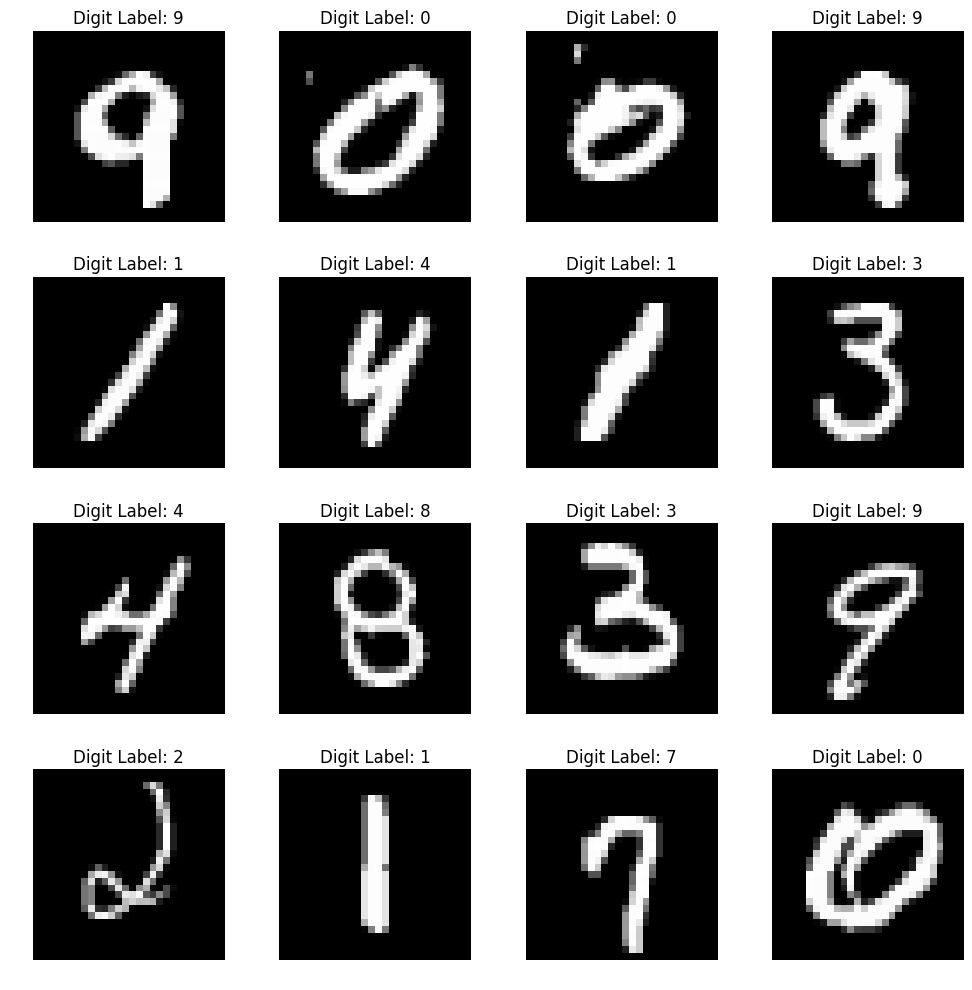

In [10]:
# generate a list of 16 random rows which are our digits
rand_idx = np.random.choice(train_df.index, size=16, replace=False)
# generate a 4x4 grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

# define counter over rand_idx list elements
i = 0
# axs is a 4x4 array so we flatten it into a vector in order to loop over it
for ax in axs.reshape(-1):
    # Title is digit label, which can be found by referencing the label column of the row specified by rand_idx[i]
    ax.set_title("Digit Label: %d" % train_df['label'].iloc[rand_idx[i]])
    # pixel_mat(rand_idx[i]) is the pixel matrix. 
    # The imshow flags are the ones that are used in the matshow wrapper
    ax.imshow(pixel_mat(rand_idx[i]), cmap=plt.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
# tight_layout gives more spacing between subplots    
plt.tight_layout()   
# Tell matplotlib to draw all of the previously generated objects
plt.show()

If you run this often enough, you should find that some of the handwritten digits can be challenging to recognize with the human eye.  It is possible that a human would not achieve a 0% error rate over the entire dataset.

### Zero padding

As we ran the matshow commands,  we should also see that there is a consistent padding of blank pixels around the images.  In practical terms, this means that some of our features simply take the value 0 with no variation over the training and/or test set.  Some machine learning algorithms with feature selection will learn to ignore these useless features, but according to the LeCun web page, certain approaches were improved by the presence of these zero variation features.

Even if the learning algorithm does feature selection,  it can be the case that a feature from the training set that is selected by the model has zero variation over the test set.  This feature cannot be used to make predictions on the test examples and, in a sense, we might have wasted some of our learning budget on a useless feature.

For these reasons, we will store a list of columns that is always padding over either the training or test set, since we probably don't want to use them for learning purposes.  We will have an opportunity to experiment below to see if there is a measurable effect of including or dropping these features while using a given learning algorithm.

We used some of the below methods earlier when displaying the pixel matrices.  We'll explain what was going on there in a bit more detail here.  First, let's look at the output of the following expression.

In [11]:
train_df == 0

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


This is another useful feature of pandas: operations on dataframes return new dataframes instead of overwriting the old ones.  In a particular application, you will need to decide when to assign a new expression to the output of a pandas function or to overwrite the original dataframe.  Generally it's easier to recover from mistakes if your original data is still stored somewhere, but for a very large dataset, it's possible that memory constraints might become an issue.

Also note that, the expression above wasn't just a function applied to a dataframe, it was a conditional expression.  But we still obtained a new dataframe whose entries were the boolean result of the conditional statement applied to the individual cells.

Since the output of the conditional statement was a dataframe itself, we can use the pandas all() function to test if the conditional is true over every value of the index.   

In [12]:
(train_df == 0).all()

label       False
pixel0       True
pixel1       True
pixel2       True
pixel3       True
pixel4       True
pixel5       True
pixel6       True
pixel7       True
pixel8       True
pixel9       True
pixel10      True
pixel11      True
pixel12     False
pixel13     False
pixel14     False
pixel15     False
pixel16      True
pixel17      True
pixel18      True
pixel19      True
pixel20      True
pixel21      True
pixel22      True
pixel23      True
pixel24      True
pixel25      True
pixel26      True
pixel27      True
pixel28      True
            ...  
pixel754     True
pixel755     True
pixel756     True
pixel757     True
pixel758     True
pixel759     True
pixel760     True
pixel761    False
pixel762    False
pixel763    False
pixel764    False
pixel765    False
pixel766    False
pixel767    False
pixel768    False
pixel769    False
pixel770    False
pixel771    False
pixel772    False
pixel773    False
pixel774    False
pixel775    False
pixel776    False
pixel777    False
pixel778  

This is another dataframe with a single row. Each True corresponds to a column that was zero for every row, which is exactly the type of zero padding that we were concerned about. 

N.B. Pandas actually stores one-dimensional indexed and labeled arrays in a data structure that it calls a Series. A pandas Series is very closely related to the python dictionary data structure, while a pandas DataFrame is analogous to a dictionary of Series objects.  See more at <http://pandas.pydata.org/pandas-docs/stable/dsintro.html>

Note that this is pixel-wise checking for zero variation features, as opposed to redrawing a minimal bounding box around all of the digit images.   What we're doing isn't necessarily appropriate for the case here where our features consist of the unrolled pixel data and we're not explicitly forcing the geometry of the image into our algorithm.  If our ML algorithm was a convolutional neural net, we would not want to delete pixels from the interior of the bounding box, since it would complicate the procedure of windowing over the geometry of the image.  However, in the case of CNNs we often have to introduce zero padding for the inner layers of a deep structure, so it's unlikely that we would bother removing the zero padding on the input features.

We can obtain the list of zero-variation column names using the columns() method:

In [13]:
train_df.columns[(train_df == 0).all()].tolist()

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel82',
 'pixel83',
 'pixel84',
 'pixel85',
 'pixel111',
 'pixel112',
 'pixel139',
 'pixel140',
 'pixel141',
 'pixel168',
 'pixel196',
 'pixel392',
 'pixel420',
 'pixel421',
 'pixel448',
 'pixel476',
 'pixel532',
 'pixel560',
 'pixel644',
 'pixel645',
 'pixel671',
 'pixel672',
 'pixel673',
 'pixel699',
 'pixel700',
 'pixel701',
 'pixel727',
 'pixel728',
 'pixel729',
 'pixel730',
 'pixel731',
 'pixel754',
 'pixel755',
 'pixel756',
 'pixel757',
 'pixel758',
 'pixel759',
 'pixel760',
 'pixel780',
 'pixel781',
 'pixel782',
 'pixel783']

We should also find the zero-variation columns in the test set and then put the combined results together in a list (using set() to get the unique elements in both the train and test lists).

In [14]:
zero_cols = list(set(train_df.columns[(train_df == 0).all()].tolist() + test_df.columns[(test_df == 0).all()].tolist()))
len(zero_cols)

94

This padding actually accounts for almost 12% of the original features.

## Frequency Distribution of Digits, Sparsity of Features 

A data analysis question we might ask is whether we have equal numbers of each digit appearing in the dataset, or if some digits are favored over another?  This might affect our machine learning problem, because if a particular digit was very rare in the dataset, it might be relatively hard to learn how to distinguish that digit from the others.

To answer this question, we only need the label column from the train_df dataframe.  We can assign this to a new dataframe (actually Series as briefly mentioned above):

In [15]:
label_df = train_df['label']
label_df

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, dtype: int64

Pandas provides a value_counts method, which we feed into sort_index to accomplish a sort on the labels:

In [16]:
counts_df = label_df.value_counts().sort_index()
counts_df

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

If we want the relative frequencies, we can specify that in the value_counts call using the normalize flag:

In [17]:
freq_df = label_df.value_counts(normalize=True).sort_index()
freq_df

0    0.09838
1    0.11152
2    0.09945
3    0.10360
4    0.09695
5    0.09036
6    0.09850
7    0.10479
8    0.09674
9    0.09971
Name: label, dtype: float64

Pandas also provides functions to compute mean and standard deviation over the columns or rows:

In [18]:
print("Mean of digit frequency is: %f, standard deviation is: %f" % (freq_df.mean(), freq_df.std()))

Mean of digit frequency is: 0.100000, standard deviation is: 0.005645


Statistically speaking, the frequency  of 1's is a bit more than $2\sigma$ higher the mean, while that of 5's is almost $2\sigma$ lower than the mean.  It's hard to say at this point whether this is enough to cause problems, but we don't have the ability to change the dataset that we're given. 

Another thing that we have remarked on is that many values of the pixels are blank over the images. The reason for this is clear from the images themselves, but we can make some quantitative observations.

If we're interested in the general distribution of pixel intensity of all of the pixels, we can reshape the dataframe. First we drop the label column, then stack all of the pixels into a single column.  The output is actually a series, indexed by the original index as well as the pixel label:

In [19]:
stack_df = train_df.drop('label', axis=1).stack()
stack_df

0      pixel0      0
       pixel1      0
       pixel2      0
       pixel3      0
       pixel4      0
       pixel5      0
       pixel6      0
       pixel7      0
       pixel8      0
       pixel9      0
       pixel10     0
       pixel11     0
       pixel12     0
       pixel13     0
       pixel14     0
       pixel15     0
       pixel16     0
       pixel17     0
       pixel18     0
       pixel19     0
       pixel20     0
       pixel21     0
       pixel22     0
       pixel23     0
       pixel24     0
       pixel25     0
       pixel26     0
       pixel27     0
       pixel28     0
       pixel29     0
                  ..
41999  pixel754    0
       pixel755    0
       pixel756    0
       pixel757    0
       pixel758    0
       pixel759    0
       pixel760    0
       pixel761    0
       pixel762    0
       pixel763    0
       pixel764    0
       pixel765    0
       pixel766    0
       pixel767    0
       pixel768    0
       pixel769    0
       pixel7

We can then obtain a frequency for each possible value of the pixel count using the commands from before:

In [20]:
stack_df.value_counts(normalize=True).sort_index()

0      0.80847
1      0.00049
2      0.00072
3      0.00077
4      0.00081
5      0.00083
6      0.00080
7      0.00083
8      0.00066
9      0.00081
10     0.00075
11     0.00076
12     0.00065
13     0.00085
14     0.00057
15     0.00061
16     0.00061
17     0.00058
18     0.00058
19     0.00073
20     0.00064
21     0.00076
22     0.00058
23     0.00048
24     0.00054
25     0.00064
26     0.00051
27     0.00051
28     0.00054
29     0.00079
        ...   
226    0.00076
227    0.00054
228    0.00062
229    0.00050
230    0.00058
231    0.00063
232    0.00064
233    0.00079
234    0.00071
235    0.00062
236    0.00067
237    0.00064
238    0.00057
239    0.00059
240    0.00071
241    0.00075
242    0.00066
243    0.00078
244    0.00079
245    0.00076
246    0.00072
247    0.00080
248    0.00075
249    0.00084
250    0.00122
251    0.00238
252    0.01415
253    0.03239
254    0.01701
255    0.00678
dtype: float64

We see that 80% of the pixel values have 0 intensity across the dataset.   If we want to bin the intensity values into statistical quantiles, we can do that.  For example, we can specify 4 bins of uniform size by hand using the cut function. This operates on an array, so we pass stack_df.values into it: 

In [21]:
intensity_cuts = pd.cut(stack_df.values, 4)
intensity_cuts

[(-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], ..., (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75]]
Length: 32928000
Categories (4, object): [(-0.255, 63.75] < (63.75, 127.5] < (127.5, 191.25] < (191.25, 255]]

We can apply the value_counts function to this object:

In [22]:
pd.value_counts(intensity_cuts, normalize=True).sort_index()

(-0.255, 63.75]    0.84323
(63.75, 127.5]     0.02414
(127.5, 191.25]    0.02635
(191.25, 255]      0.10627
dtype: float64

We see that 84% of the pixels are either 0 or low intensity, while only around 11% are high intensity. 

## Design Matrices

At this point, it's important to note that most of the scikit-learn functions expect our data to be in the form of numpy arrays rather than pandas dataframes. Fortunately pandas provides several functions to faciliate this.  

In machine learning terms, we want to define the design matrix for our data.  This is a 2d matrix where the row index corresponds to the observations, while the column index corresponds to the features.  In practice, this means that we need to identify the features we are including in our model, and ensure that they are represented in numerical form during our preprocessing. 

For our digit dataset here, the only column that does not correspond to a feature is the label column, which is actually our response variable.  The actual features are integer-valued pixel intensity values that are already numerical data types, so it is not necessary to do any preprocessing.  

Let's first define our response, which is the 'label' column of the train_df dataframe.  Pandas provides various ways to index and reference slices of a dataset, but the convenient method here is to specify the column name:

In [23]:
train_df['label'].head(10)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

So we see that train_df['label'] is a new dataframe obtained by restricting train_df to the single column named 'label'. We only used the head() function here to avoid having the output take up too much space.  It is also important to note that the index of this dataframe is obtained from that of the parent train_df.

Pandas allows us to convert a dataframe to a numpy array using the values() function.  Specifically, 

In [24]:
train_df['label'].head(10).values

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

is a 1d array or vector. We can therefore define a numpy vector containing all of the response variables with the statement

In [25]:
y_train = train_df['label'].values

For the design matrix, we want to drop the 'label' column, since it is inappropriate to teach our machine learning model to learn on the response variable.  In other datasets, we might have to drop additional columns that contain unique ids or other information that would be similarly inappropriate to include in our model.

We can use the pandas drop() function to drop rows or columns, by specifying the axis along which to drop slices.  For a row we would use axis=0, while for a column in the present case, we use axis=1.  As an example, compare 

In [26]:
train_df.drop(['label'], axis=1).head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


to the output of train_df.head(10) that was given earlier in the notebook.  If we have additional columns to drop, we can replace ['label'] with a list of appropriate column names, i.e. ['col1', 'col2', ....].  To define the design matrix, we can combine this with the values() function:

In [27]:
x_train = train_df.drop(['label'], axis=1).values

## Creating Validation Sets

As mentioned in the overview,  in order to do internal testing on our models, we want to split the kaggle training data into an actual training set and a validation set.  Then we will validate our models by training only on the internal training set and validate our models by testing the quality of predictions on our validation set.

In this section we will set up a framework to do this.  In particular, we will use a straight training/validation split,  since that will provide a clear visualization of the validation procedure.  We will also set up cross-validation functions which make for better statistical practice, but can be more confusing at first glance.   

Additionally, since there are 42000 observations in the training set,  cross-validation can be mildly resource-intensive, especially on older computers.  This is another reason to use a single validation split, but we will also generate a small tuning set of 5000 examples that we can use to run cross-validation in a more reasonable amount of time.  We will for example use this part of the data to tune the free parameters (hyperparameters) of our models.

The machine learning tools we'll be using in this notebook are primarily found in the scikit-learn python libraries. In particular, the tools for creating validation sets are found in the model_selection subkit.  For now we will import two functions:

In [28]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

Extensive information about these functions can be found in the scikit-learn documentation, but it's worthwile to explain them in a bit of detail here.  The function KFold provides an iterator that can be used to divide a dataset $S$ into $k$ subsets called "folds."  A validation procedure uses $k-1$ of folds as a training set, with the remaining fold held out as the validation set.  Cross-validation repeats this process over all $k$ different combinations of folds into training and validation sets.  Specifically, KFold provides the indices needed to split a numpy array or pandas dataframe into the training/validation pairs.  By using a switch, you can specify that KFold perform a random permutation of the original indices before performing the splits, which can be useful in trying to ensure that each fold represents a random sample of the population. 

StratifiedKFold is an implementation of KFold that takes as an additional argument a vector of target classes.  It attempts to ensure that each fold has a similar population density of each target class, avoiding imbalances.  We use it here because we have 10 classes of digits and want to preserve the relative frequency of them in all of our splits. 

ShuffleSplit is another generator that allows us to specify the fraction of the dataset to split into a validation set.  It then randomly permutes the original indices and provides a split of indices that can be used to build the required sets.  We use this because we have precise control over the size of the validation set as opposed to KFold. StratifiedShuffleSplit is an implementation that preserves class frequencies.

At the moment we will be using StratifiedShuffleSplit.  The first step is to define the object that we'll use to create our split:

In [29]:
validation_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=46)

We have specified n_splits=1 because we only want one split into training/validation right now.  We have chosen test_size=0.25 so that our validation set is build from 25% of the data.  The specific number we use is up to personal preference.  Here our training set will still have 31500 observations which seems large enough.  If we had a very small dataset to start out with, we might be forced to use a smaller validation set (or just use cross-validation).  

Finally, we have specified a seed for the random number generator using the random_state flag.  This will tend to ensure that our results are repeatable in future study or for other users of this notebook.

Having defined the splitting operation, the next step is to apply it to our design matrix and response vector: 

In [30]:
validation_split.split(x_train, y_train)

<generator object split at 0x7f0d16a27aa0>

We can note a few things here.  First, we needed to include the response vector because we are doing a class-stratified split.  The functions ShuffleSplit and KFold can be applied by specifying only the design matrix, since they don't use information about the response.  Second, the object type that is returned here is a python generator.  In order to obtain a list of indices, we need to apply the python list() function, which forces python to actually execute the generator:

In [31]:
list(validation_split.split(x_train, y_train))

[(array([40237, 36373, 22534, ...,  7590, 40484, 26735]),
  array([26645,  5031, 36381, ..., 23624, 10471, 28943]))]

We actually get a list containing a tuple of numpy arrays. Had we specified n_splits > 1, this list would contain a tuple for every split. We can assign each array of indices to variable names using the declaration

In [32]:
training_idx, validation_idx = list(validation_split.split(x_train, y_train))[0]

Using these index lists, we can define our training and validation sets in a couple of ways.  The most direct way is to just truncate the design and response arrays via:

In [33]:
x_training = x_train[training_idx]
y_training = y_train[training_idx]

x_validation = x_train[validation_idx]
y_validation = y_train[validation_idx]

We can also use the iloc indexing method in pandas to define new datasets by restricting the train_df dataframe to the rows defined by the split:

In [34]:
training_df = train_df.iloc[training_idx]
validation_df = train_df.iloc[validation_idx]

We can then use these (column-labeled) dataframes to define new design matrices using values().

### Tuning Split

As mentioned earlier,  running cross-validation over the full 31500 entries in the training dataset can be slow, so we will also define a smaller set of the training dataset over which cross-validation will be faster.  In this case, we use the train_size flag to specify 15% of the data (4725 rows):

In [35]:
tuning_split = StratifiedShuffleSplit(n_splits=1, train_size=0.15, random_state=96)

In [36]:
tune_idx = list(tuning_split.split(x_training, y_training))[0][0]

In [37]:
x_tune = x_training[tune_idx]
y_tune = y_training[tune_idx]

For our purposes it is unecessary to construct an associated validation set.

## Metrics

In order to implement machine learning and validation, we also need an appropriate metric to tell us how well our model is performing on the data.  A familiar metric is the mean squared error between the predicted and true response values

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n  ( \hat{y}(x_i) - y_i^\text{true} )^2.$$

While MSE tends to work well for regression problems, it is often not the best metric for a classification problem.  A full discussion of metrics is beyond the goal of this notebook, but we will note that kaggle has selected the classification accuracy metric for the competition.  The accuracy can be defined as the percentage of class predictions that exactly match the true class:

$$ \text{accuracy} = \frac{1}{n} \sum_{i=1}^n  1( \hat{y}(x_i) = y_i^\text{true} ),$$

where $1(a=b)$ is the indicator function

$$ 1(a=b) = \begin{cases} 1, &  a=b, \\ 0, & a\neq b. \end{cases} .$$

Therefore, if we had 100 samples and our algorithm predicted 68 samples correctly, the accuracy would be 68/100 = 0.68 or 68%.

For a specific classification problem, other metrics, such as precision, recall or F1-score, might be more appropriate.  It is usually a kaggle best-practice to adopt the same metric that will be used to evaluate our submissions, so we will use accuracy.

The appropriate function is part of the scikit-learn metrics sublibrary.  

In [38]:
from sklearn.metrics import accuracy_score

We can execute accuracy_score(y_true, y_pred) where y_pred is a numpy vector of class predictions and y_true is a numpy vector of the true class labels.  With the default options, the value returned is the fraction of correct predictions.

## Modeling

As a warm-up for using scikit-learn for implementing machine learning algorithms, we will proceed step-by-step through the application of the RandomForestClassifier model.  Many details can be obtained by studying the scikit-learn documentation, but we will explain important points below.

A natural starting point for many machine learning problems is to apply a tree-based model.  Important reasons for this are that decision trees are not particularly sensitive to relative scalings of the data and also do not require any particular linear relationship between the features and the response in order to obtain a decent result.  As a result, we can get a benchmark prediction metric before we do any extensive preprocessing of the data.  At a minimum, we only require that our design matrix has well-defined numerical values.  Practically, then we need to make sure that we have dealt with missing features (impute NAs or remove incomplete rows) and convert categorical features to numerical ones (using one-hot or similar encoding).

For the digits problem, the dataset we're given is clean and numerical, so we can start working on our design matrices immediately.

### Random Forest

A good tree model that has a decent ratio of quality to computational complexity is Random Forests.  A detailed discussion of the model is beyond the scope of this notebook, but we'll get a bit of insight shortly when we discuss the parameters of the model.

The RandomForestClassifier can be loaded from the ensemble library:

In [39]:
from sklearn.ensemble import RandomForestClassifier

It is convenient to assign a name to our classifier:

In [40]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state = 32)

We have chosen n_jobs=-1 so that parallelizable operations will be run simultaneously on all available processor cores.  If this gives you errors, try specifying the exact number (or fewer) of cores for your particular computer.  We've also explicitly set a random seed.

In Random Forest, we grow a large number of trees and then average their predictions to get a final result.  The total number of trees to grow is controlled by the parameter n_estimators.  Also, at the nodes of the trees, instead of looking for the best split by testing all features, a random sample of features is made and the corresponding splits based on only those is tested. The number of features to include in the random sample at each split is controlled by the parameter max_features.  Finally, the parameter max_depth controls the maximum depth (number of splits along the longest branch) of the trees.

As a point of terminology, these types of parameters are usually called hyperparameters, so as not to be confused with the type of parameters that are learned in training rounds, like the coefficients in a linear model.  We will try to use the term hyperparameter as much as possible, but the term parameter is used fairly often in the scikit-learn docs and code.  If you learn a minimum amount of the theory behind the models you're using, you should always be able to determine whether a parameter is a hyperparameter or not from the context. 

Any machine learning algorithm that depends on hyperparameters requires that we choose some appropriate, if not optimal, values of the hyperparameters.  Therefore our first exercise will be to use our tuning dataset to explore the space of hyperparameters.  We work on the assumption that an optimal set of hyperparameters on a random sample of data will be nearly optimal for the full dataset.  This a necessary tradeoff when working with increasingly large datasets, for which 100s of cross-validation fits might be forbidden by available computing power and time constraints.

In lieu of drawing pictures, which can be found in any number of discussion of optimization problems, we describe the problem in words.   Our model has some number of hyperparameters and we can imagine that they take values in some n-dimensional space, either continuous or on a grid.  Given a metric function to measure the error of our algorithm (cost function), we can imagine plotting the cost function for a fixed dataset as a function of the hyperparameters.  The optimal choice of hyperparameters would be the global minimum of this function.

For the Random Forest model, the hyperparameters are discretely valued.  Furthermore, even if we had a model that only depended on continuously valued hyperparameters, it could be computationally infeasable to compute enough values of the cost function to make optimization techniques like gradient descent useful.  Therefore, we usually have to trade-off computation time for finding a choice of hyperparameters that is "optimal enough."

We'll use two techniques that approach this problem.  The first is grid search, which requires that we identify a discrete set of values for each hyperparameter that we expect to cover the region where the true optimum lives.  We then compute the cost function for all tuples of hyperparameters on the resulting grid.  However, even this requires many computations, since if we chose 10 values each for our hyperparameters in the Random Forest case, that still leaves us with a grid of 10^3 = 1000 points to compute.

Therefore the second technique addresses this problem: random search.  In random search, we still try to identify the region of hyperparameter space where we hope to find our optimum, but instead of sampling a dense grid of points, we sample a random choice of tuples (perhaps 20 vs. the 1000 needed in grid search).

Personally, I like to use a combination of random search and grid search.  I will first use random search to find a candidate optimum.  Then I will use 1d grids for each hyperparameter to try to look for a local minimum near the point identified by random search.

#### Hyperparameter Search and Optimization

Let us use these methods for our present problem. We first load the RandomizedSearchCV function from scikit-learn:

In [41]:
from sklearn.model_selection import RandomizedSearchCV

There is a convenient function I borrowed from an example of random search on the scikit-learn docs pages:

In [42]:
# run randomized search
def random_search(clf, param_dist, n_iter_search, predictors, labels):
    rs = RandomizedSearchCV(clf, param_distributions=param_dist, scoring = 'accuracy',
                                   n_jobs=-1, n_iter=n_iter_search, cv=kfold) 
    start = time()
    rs.fit(predictors, labels)
    print("RandomizedSearchCV took %.2f seconds for %d candidates" 
          " parameter settings." % ((time() - start), n_iter_search))
    report(rs.cv_results_)

Note that the effect cost function that is being compared is the average of the accuracy on the leave-out fold in a cross-validation scheme.  If you want to use this or a similar function for another problem, be sure to rewrite it to use the appropriate scoring function if you are using a different metric.

This uses the python time function, so we need to import it.

In [43]:
from time import time

This also requires that we specify a cross-validation scheme, so we will use the StratifiedKFold function that we loaded and discussed earlier and define a generator for 10-fold CV:

In [44]:
kfold = StratifiedKFold(n_splits=10, random_state=7)

Furthermore, the same scikit example had a simple function to report the top 3 random search scores:

In [45]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

The random_search function requires that we specify param_dist, which is a dictionary of hyperparameter names and the statistical distribution we should draw the values from.  These distributions can either be specified as an actual distribution from the scipy.stats library or as a discrete python list of values to be sampled uniformly.  In our case, we will use a uniform random distribution over a likely range of values:

In [46]:
import scipy
rf_param =  {'n_estimators': scipy.stats.randint(50,400), 'max_depth': scipy.stats.randint(2,20), 
             'max_features': scipy.stats.randint(15,40)}

These values are very rough guesses, but since we will be doing a 2nd round of 1d grid searches, we should be able to make up for a poor choice at this stage.  Actually, max_features is typically chosen to be around sqrt(total # of features).  Since we have around 700 non-trivial features for this data, that suggests max_features ~ 26.

We can then apply the random_search function to our classifer, specifying n_iter_search = 20 to sample 20 random points in the sample region.

In [47]:
random_search(rf_clf, rf_param, 20, x_tune, y_tune)

RandomizedSearchCV took 204.16 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.939 (std: 0.012)
Parameters: {'max_features': 16, 'n_estimators': 324, 'max_depth': 18}

Model with rank: 2
Mean validation score: 0.938 (std: 0.013)
Parameters: {'max_features': 22, 'n_estimators': 354, 'max_depth': 15}

Model with rank: 3
Mean validation score: 0.937 (std: 0.009)
Parameters: {'max_features': 19, 'n_estimators': 225, 'max_depth': 19}

Model with rank: 3
Mean validation score: 0.937 (std: 0.012)
Parameters: {'max_features': 19, 'n_estimators': 248, 'max_depth': 16}

Model with rank: 3
Mean validation score: 0.937 (std: 0.013)
Parameters: {'max_features': 15, 'n_estimators': 324, 'max_depth': 14}



This took around 4 minutes to run on a 5 year old 4-core machine. Grid search for 1000 points would have taken over 3 hours.  The best point resulted in a 94% accuracy on the tuning set and then next 2 best values were not far behind.

N.B. Because of the randomness in random search, it is unlikely that exactly the parameters n_estimators = 296, max_depth = 15, max_features = 31 that I obtained while writing this will be obtained by a rerunning of the random search code, such as occurs when I edit the notebook.  There will be occasional discrepencies between random outputs and the discussion in the text because of this.

Now we want to probe 1d deviations away from the best value that we identified. I use the following function to do this:

In [48]:
from sklearn.model_selection import cross_val_score

# run single parameter search 
def single_search(clf, params, predictors, labels):
    start = time()
    clf_results_df = pd.DataFrame(dtype = 'float64')
    count = 0
    for k, v in params.items():
        for val in v:
            clf.set_params(**{k: val})
            clf_results_df.loc[count, k] = val
            results = cross_val_score(clf, predictors, labels, cv=kfold, scoring = 'accuracy')
            (clf_results_df.loc[count, 'accuracy'], clf_results_df.loc[count, 'std dev']) = \
                (results.mean(), results.std())
            count += 1
    print("single_search took %.2f seconds for %d candidates." % ((time() - start), count))            
    return clf_results_df


This uses the function cross_val_score so we import it.  The variable input is a dictionary for a single hyperparameter giving  a list of the grid points that we want to score on.  Convenient functions to generate this list are the numpy arange and logspace functions that you should read up on.  The output of the function is a dataframe listing the hyperparamter values, the CV metric score and the standard deviation in the score over the CV folds.

Let's apply this to the max_features hyperparameter.

single_search took 183.69 seconds for 9 candidates.


,max_features,accuracy,std dev
0,5.0,0.92870,0.00989
1,10.0,0.93462,0.01033
6,35.0,0.93758,0.01397
2,15.0,0.93778,0.01160
7,40.0,0.93822,0.01364
3,20.0,0.93884,0.01028
8,45.0,0.93926,0.01007
4,25.0,0.93947,0.01195
5,30.0,0.94095,0.01091


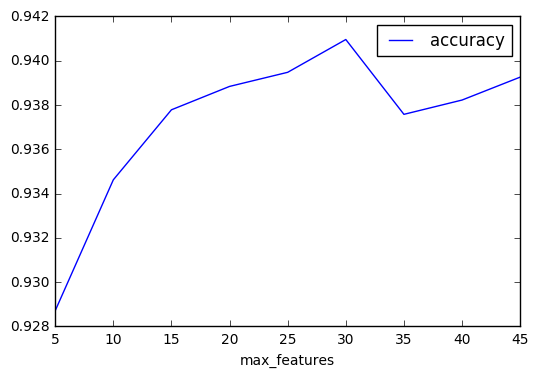

In [49]:
rf_clf = RandomForestClassifier(n_estimators = 296, max_depth = 15, max_features = 31, n_jobs=-1, random_state = 32)
rf_params = {'max_features': np.arange(5, 50, 5).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['max_features'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

Note that we redefine the classifer using the hyperparameters found by random search.  Then we specify the hyperparameter we want to vary together with a grid that surrounds the point found by random search. We used the numpy function tolist() to convert the arange numpy array to a simple python list.  We save the output of single_search as a dataframe, allowing simple plots and sorts to be done.

Also, I am purposely using a very large range of hyperparameters away from the random search point for illustrative purposes.  You will probably find that you have better results on most problems by just probing small neighborhoods of the starting point.

With the accuracy metric, we are looking for a maximum. max_features = 31 identified by random search is definitely very close to a local max, but we should check out values > 45 to be sure: 

single_search took 248.03 seconds for 9 candidates.


,max_features,accuracy,std dev
7,65.0,0.93630,0.01159
8,70.0,0.93652,0.01030
6,60.0,0.93674,0.01197
1,35.0,0.93758,0.01397
2,40.0,0.93822,0.01364
5,55.0,0.93862,0.01263
3,45.0,0.93926,0.01007
4,50.0,0.94053,0.01018
0,30.0,0.94095,0.01091


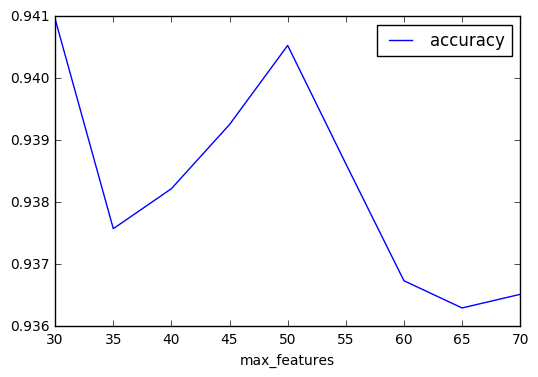

In [50]:
rf_clf = RandomForestClassifier(n_estimators = 296, max_depth = 15, max_features = 31, n_jobs=-1, random_state = 32)
rf_params = {'max_features': np.arange(30, 75, 5).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['max_features'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

We are unlikely to find a better max in this region, so let's just make a finer search around max_features = 31:

single_search took 134.60 seconds for 6 candidates.


,max_features,accuracy,std dev
5,35.0,0.93758,0.01397
3,33.0,0.93820,0.01172
4,34.0,0.93925,0.01076
1,31.0,0.93970,0.01087
0,30.0,0.94095,0.01091
2,32.0,0.94138,0.01066


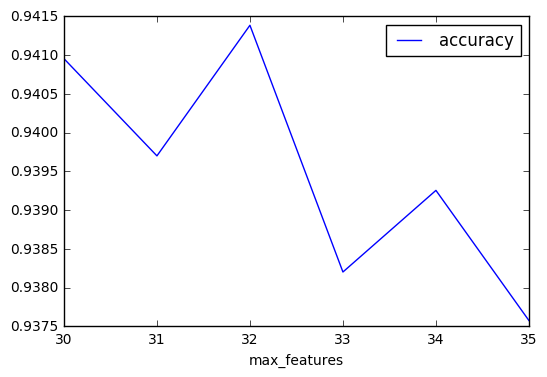

In [51]:
rf_clf = RandomForestClassifier(n_estimators = 296, max_depth = 15, max_features = 31, n_jobs=-1, random_state = 32)
rf_params = {'max_features': np.arange(30, 36, 1).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['max_features'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

Therefore, we get about 0.1 standard deviation's worth of accuracy by improving max_features from 31 to 32.  We will often find that the potential gain in mean cost is smaller than the statistical variation over the CV folds.  Therefore the added optimization beyond random search might not be worth the human time cost.  

As an exercise, we will continue the procedure with the remaining hyperparameters, remembering to update our best set of hyperparameters when appropriate:

single_search took 152.53 seconds for 7 candidates.


,max_depth,accuracy,std dev
0,5.0,0.86181,0.01376
1,10.0,0.93548,0.01220
3,20.0,0.93885,0.01085
4,25.0,0.93948,0.00995
5,30.0,0.93948,0.00995
6,35.0,0.93948,0.00995
2,15.0,0.94138,0.01066


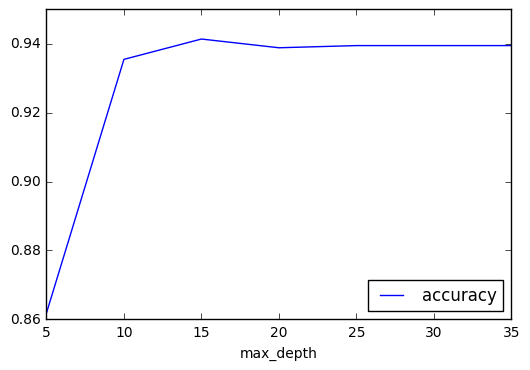

In [52]:
rf_clf = RandomForestClassifier(n_estimators = 296, max_depth = 15, max_features = 32, n_jobs=-1, random_state = 32)
rf_params = {'max_depth': np.arange(5, 40, 5).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['max_depth'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

Again I've purposely probed a very large neighborhood of max_depth = 15 to give an idea of how the cost function behaves.  In general, Random Forests let us grow very large trees without causing much overfitting, but we want to choose the best smaller value that leads to a good result with small computational overhead.  In this case we want to probe the region around max_depth = 15 more finely:

single_search took 251.29 seconds for 11 candidates.


,max_depth,accuracy,std dev
0,10.0,0.93548,0.01220
1,11.0,0.93652,0.01180
2,12.0,0.93736,0.01225
4,14.0,0.93778,0.01076
3,13.0,0.93821,0.01357
7,17.0,0.93884,0.01133
10,20.0,0.93885,0.01085
9,19.0,0.93906,0.01237
8,18.0,0.93906,0.01110
6,16.0,0.93926,0.01082


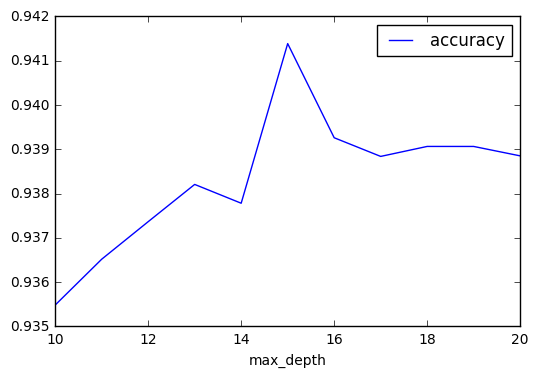

In [53]:
rf_clf = RandomForestClassifier(n_estimators = 296, max_depth = 15, max_features = 32, n_jobs=-1, random_state = 32)
rf_params = {'max_depth': np.arange(10, 21, 1).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['max_depth'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

Once again, the original point identified by random search was excellent. We can't improve max_depth=15.  Let's check n_estimators:

single_search took 210.27 seconds for 10 candidates.


,n_estimators,accuracy,std dev
0,50.0,0.93124,0.00763
1,100.0,0.93418,0.00861
2,150.0,0.93652,0.01128
3,200.0,0.93778,0.00975
9,500.0,0.93863,0.01214
4,250.0,0.93884,0.01093
6,350.0,0.93969,0.01141
8,450.0,0.94011,0.01198
5,300.0,0.94096,0.01038
7,400.0,0.94159,0.01247


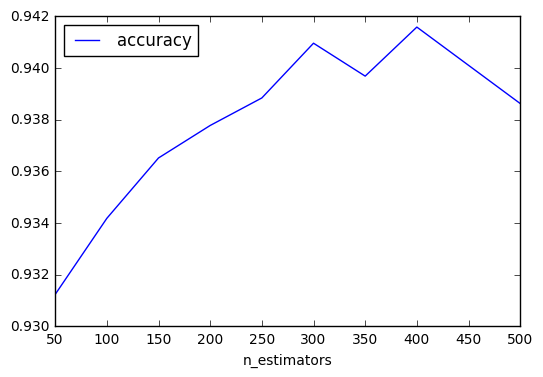

In [54]:
rf_clf = RandomForestClassifier(n_estimators = 296, max_depth = 15, max_features = 32, n_jobs=-1, random_state = 32)
rf_params = {'n_estimators': np.arange(50, 550, 50).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['n_estimators'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

Here we seem to gain much less than 1 standard deviation worth of accuracy in adding 25% more trees. Let's just zoom in on the original n_estimators=296 point and look around at the new peak at 400:

single_search took 247.16 seconds for 11 candidates.


,n_estimators,accuracy,std dev
0,290.0,0.94075,0.01027
1,291.0,0.94075,0.01055
9,299.0,0.94096,0.01042
10,300.0,0.94096,0.01038
3,293.0,0.94096,0.01066
5,295.0,0.94117,0.01031
8,298.0,0.94117,0.01060
2,292.0,0.94117,0.01039
6,296.0,0.94138,0.01066
7,297.0,0.94138,0.01066


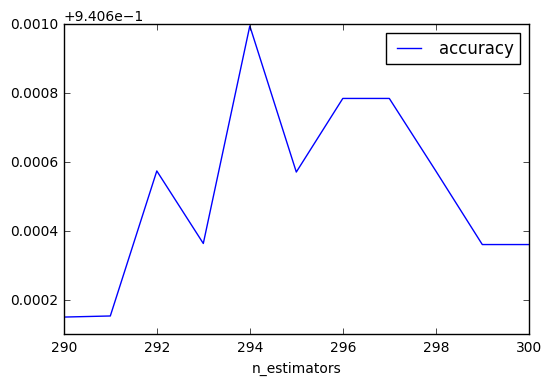

In [55]:
rf_clf = RandomForestClassifier(n_estimators = 296, max_depth = 15, max_features = 32, n_jobs=-1, random_state = 32)
rf_params = {'n_estimators': np.arange(290, 301, 1).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['n_estimators'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

As a rule of thumb, you will almost never find a statistically significant change in CV cost over such a fine range of number of trees.  It's rarely necessary to search finer than a scale of 20 or maybe 10 trees per grid point.

single_search took 324.46 seconds for 11 candidates.


,n_estimators,accuracy,std dev
1,360.0,0.93926,0.01050
9,440.0,0.93968,0.01312
0,350.0,0.93969,0.01141
8,430.0,0.93989,0.01200
3,380.0,0.93989,0.01241
7,420.0,0.93990,0.01276
10,450.0,0.94011,0.01198
4,390.0,0.94053,0.01306
2,370.0,0.94074,0.01145
6,410.0,0.94074,0.01233


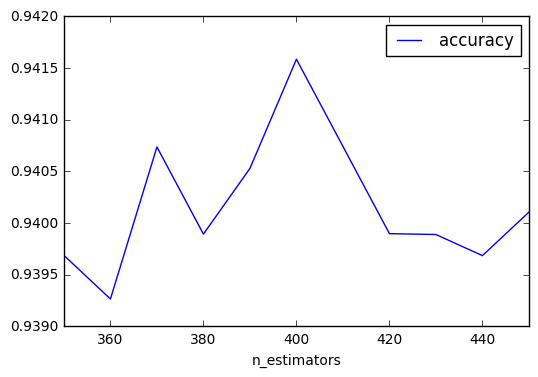

In [56]:
rf_clf = RandomForestClassifier(n_estimators = 296, max_depth = 15, max_features = 32, n_jobs=-1, random_state = 32)
rf_params = {'n_estimators': np.arange(350, 460, 10).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['n_estimators'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

Going from 296 trees to 400 is not too bad computationally, so we will update our hyperparameters.  Let us see if the optimal values of the other hyperparameters has changed with the jump in number of trees.

single_search took 259.64 seconds for 9 candidates.


,max_features,accuracy,std dev
2,29.0,0.93820,0.01195
4,31.0,0.93906,0.01152
8,35.0,0.93947,0.01445
0,27.0,0.93948,0.01223
7,34.0,0.93949,0.01237
6,33.0,0.94009,0.01130
1,28.0,0.94055,0.01363
3,30.0,0.94096,0.01231
5,32.0,0.94159,0.01247


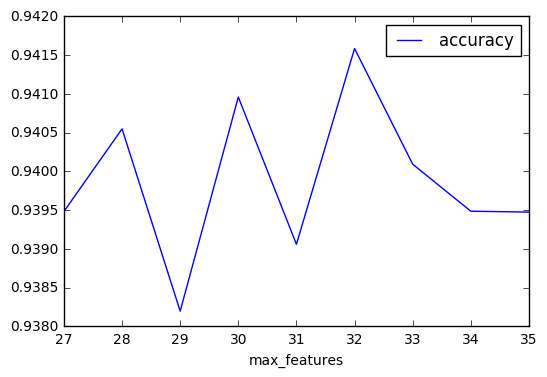

In [57]:
rf_clf = RandomForestClassifier(n_estimators = 400, max_depth = 15, max_features = 32, n_jobs=-1, random_state = 32)
rf_params = {'max_features': np.arange(27, 36, 1).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['max_features'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

single_search took 320.23 seconds for 11 candidates.


,max_depth,accuracy,std dev
0,10.0,0.93525,0.01285
1,11.0,0.93630,0.01302
2,12.0,0.93778,0.01153
3,13.0,0.93863,0.01301
7,17.0,0.93928,0.01082
10,20.0,0.93949,0.01099
4,14.0,0.93969,0.01464
6,16.0,0.94032,0.01119
9,19.0,0.94033,0.01113
8,18.0,0.94076,0.01189


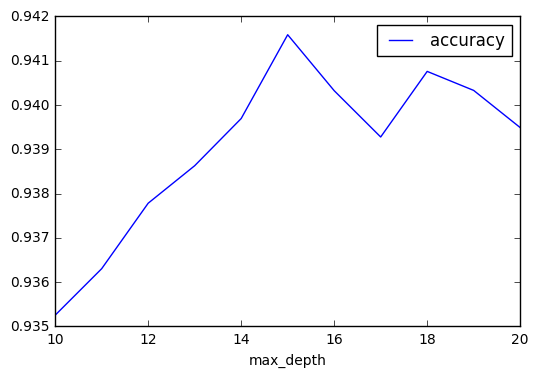

In [58]:
rf_clf = RandomForestClassifier(n_estimators = 400, max_depth = 15, max_features = 32, n_jobs=-1, random_state = 32)
rf_params = {'max_depth': np.arange(10, 21, 1).tolist()}
rf_df = single_search(rf_clf, rf_params, x_tune, y_tune)
rf_df.plot(x = ['max_depth'], y = ['accuracy'])
rf_df.sort_values(['accuracy'])

Since those optimal values didn't change we have some evidence that we have just moved closer to the same local optimum, rather than jumped to some other local optimum.  We cannot say that this local optimum is the global optimum, however.

Let us recap. Random Search found a point with CV accuracy $0.939\pm 0.012$ in 4 mins and another 30+ minutes of grid searching found a nearby point with CV accuracy of $0.942\pm 0.012$. Therefore the improvement was only a fraction of the statistical error in the cost.  This is very typical and for many applications random search alone is fine for choosing good hyperparameters.  

In [59]:
rf_clf = RandomForestClassifier(n_estimators = 400, max_depth = 15, max_features = 32, random_state = 32)

#### Learning Curve

We are almost ready to train on our full training set and make a prediction on the validation set. However, it is useful to pause and examine how the quality of our result will be affected by the number of points that we use to train our model.  The resulting plot of training/CV cost vs training set size is known as the learning curve.

It is convenient to borrow the plotting function from <http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py>:

In [60]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pylab' from '/usr/lib64/python2.7/site-packages/matplotlib/pylab.pyc'>

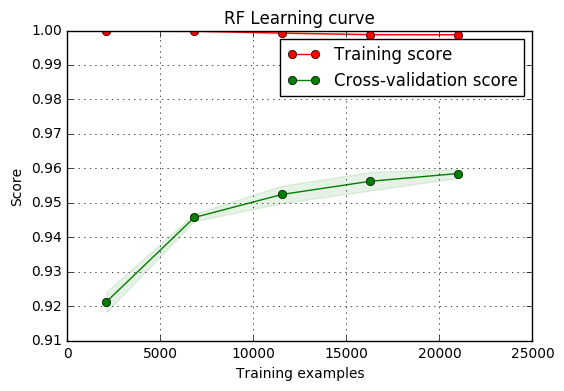

In [61]:
plot_learning_curve(rf_clf, "RF Learning curve", x_training, y_training, n_jobs=-1)

We see that the training accuracy actually goes down a bit as the number of training examples increases (harder to fit), while the CV accuracy makes sizable gains at small training sizes which start to plateau at large values. For example, we wouldn't expect to gain more than a few 0.1% CV accuracy if we could add another 20000 examples. We would probably gain more by seeking a better model.

#### Validation

Training the model is done by calling the fit method to the classifier, in this case on the full training set.

In [62]:
rf_clf.fit(x_training, y_training)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=32, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=32,
            verbose=0, warm_start=False)

Until now, the fit calls have been done for us within functions like RandomizedSearchCV and cross_val_score.

Predictions are done by calling the predict method, now over the validation design matrix:

In [63]:
y_rf_pred = rf_clf.predict(x_validation)

The validation accuracy is obtained by comparing with the true class values stored as y_validation:

In [64]:
accuracy_score(y_validation, y_rf_pred)

0.96466666666666667

This is an error rate of around 3.5%, which isn't great compared to the state of the art, but perhaps is good given that we didn't have to do any data processing at all.

#### Drop Padding

Earlier, we saw that there were features (pixel columns) that were zero for every sample in either the kaggle train or test set, representing padding around the digits.  Let's check whether dropping those columns has a measurable effect on the validation score.

Since we already defined training_df and validation_df, it is easy to drop columns and build numpy arrays from them:

In [65]:
x_training_dropzeros = training_df.drop(zero_cols, axis=1).values

x_validation_dropzeros = validation_df.drop(zero_cols, axis=1).values

Note that the labels don't change when we drop these columns, so we didn't redefine those.

To build the tuning set, we can first make a tune_df dataframe:

In [66]:
tune_df = training_df.iloc[tune_idx]

x_tune_dropzeros = tune_df.drop(zero_cols, axis=1).values

We'll use random search to find appropriate hyperparameters:

In [67]:
random_search(rf_clf, rf_param, 20, x_tune_dropzeros, y_tune)

RandomizedSearchCV took 241.00 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.974 (std: 0.007)
Parameters: {'max_features': 38, 'n_estimators': 316, 'max_depth': 12}

Model with rank: 2
Mean validation score: 0.969 (std: 0.009)
Parameters: {'max_features': 34, 'n_estimators': 87, 'max_depth': 15}

Model with rank: 3
Mean validation score: 0.968 (std: 0.009)
Parameters: {'max_features': 27, 'n_estimators': 219, 'max_depth': 17}



We can apparently sample less features at the splits, since we have removed useless features.

In [68]:
rf_clf_dropzeros = RandomForestClassifier(n_estimators = 347, max_depth = 16, max_features = 25, random_state = 32)

In [69]:
rf_clf_dropzeros.fit(x_training_dropzeros, y_training)
y_rf_dropzeros_pred = rf_clf_dropzeros.predict(x_validation_dropzeros)
accuracy_score(y_validation, y_rf_dropzeros_pred)

0.98333333333333328

This is almost a 2% increase in validation accuracy, which is also almost a 2% relative increase from 0.965. Note that this was due to intelligent preprocessing of the data, rather than any tuning of the model.

The reason that the accuracy goes up has to do with the random sampling of features in the Random Forest method.  When we include zero-variance features, we're preventing the model from sampling good features at each split.

#### Flatten Greyscale

Another modification of the data that we can examine is the removal of the information of relative pixel intensity.  We can recast our design matrices to boolean and then back to an integer:

In [70]:
x_training_flat = x_training_dropzeros.astype(bool)*1

x_validation_flat = x_validation_dropzeros.astype(bool)*1

x_tune_flat = x_tune_dropzeros.astype(bool)*1

Note that we're working with the data in which we have dropped the zero-variation columns, since it gave us the best validation accuracy.  

We search for good hyperparameters:

In [71]:
random_search(rf_clf, rf_param, 20, x_tune_flat, y_tune)

RandomizedSearchCV took 167.82 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.943 (std: 0.012)
Parameters: {'max_features': 22, 'n_estimators': 318, 'max_depth': 19}

Model with rank: 2
Mean validation score: 0.942 (std: 0.013)
Parameters: {'max_features': 30, 'n_estimators': 301, 'max_depth': 14}

Model with rank: 3
Mean validation score: 0.942 (std: 0.011)
Parameters: {'max_features': 20, 'n_estimators': 208, 'max_depth': 17}



In [72]:
rf_clf_flat = RandomForestClassifier(n_estimators = 332, max_depth = 14, max_features = 35, random_state = 32)

In [73]:
rf_clf_flat.fit(x_training_flat, y_training)
y_rf_flat_pred = rf_clf_flat.predict(x_validation_flat)
accuracy_score(y_validation, y_rf_flat_pred)

0.96457142857142852

As we might have expected, the pixel intensity has a small effect on the quality of predictions. However, it is amusing that the effect is very close to the 2% that we gained by removing the useless features.

## Examining the Model's Mistakes

An important part of the validation procedure is to examine what types of errors the model is making.  Insights into the problem might gives us ideas on how to improve the model or further process the data in order to correct some of the errors.  

Let us determine the examples in the validation set  where the drop zeros model predictions were wrong. These correspond to the elements of y_validation that are not equal to the same entry in y_rf_dropzeros_pred.  The numpy where function returns a list of indices that satisfy a condition, so the indices corresponding to the errors are

In [76]:
error_idx = np.where(y_validation != y_rf_dropzeros_pred)[0]
error_idx

array([   29,    44,   106,   161,   200,   221,   224,   271,   321,
         332,   438,   479,   537,   557,   835,   937,   967,   972,
         988,  1015,  1040,  1048,  1083,  1094,  1111,  1151,  1220,
        1241,  1439,  1533,  1535,  1567,  1608,  1651,  1653,  1748,
        1749,  1781,  1884,  1982,  2015,  2045,  2052,  2069,  2229,
        2292,  2343,  2403,  2415,  2465,  2564,  2637,  2715,  2749,
        2750,  2774,  2783,  2826,  2992,  3047,  3069,  3081,  3248,
        3305,  3413,  3453,  3469,  3516,  3615,  3718,  3719,  3800,
        3819,  3973,  4060,  4139,  4244,  4283,  4337,  4364,  4404,
        4444,  4503,  4574,  4586,  4722,  4757,  4840,  4849,  4920,
        4960,  5099,  5153,  5165,  5279,  5460,  5493,  5600,  5609,
        5628,  5698,  5723,  5727,  5752,  5787,  5889,  5896,  5964,
        5965,  6107,  6248,  6418,  6450,  6464,  6476,  6491,  6575,
        6685,  6728,  6740,  6813,  6872,  7079,  7127,  7140,  7601,
        7618,  7673,

We can adapt the code that we used to visualize the digits to visualize the digits where the model gave the wrong prediction.  We'll choose 16 indices at random from our error_idx array and plot the image, together with the prediction and the correct label:

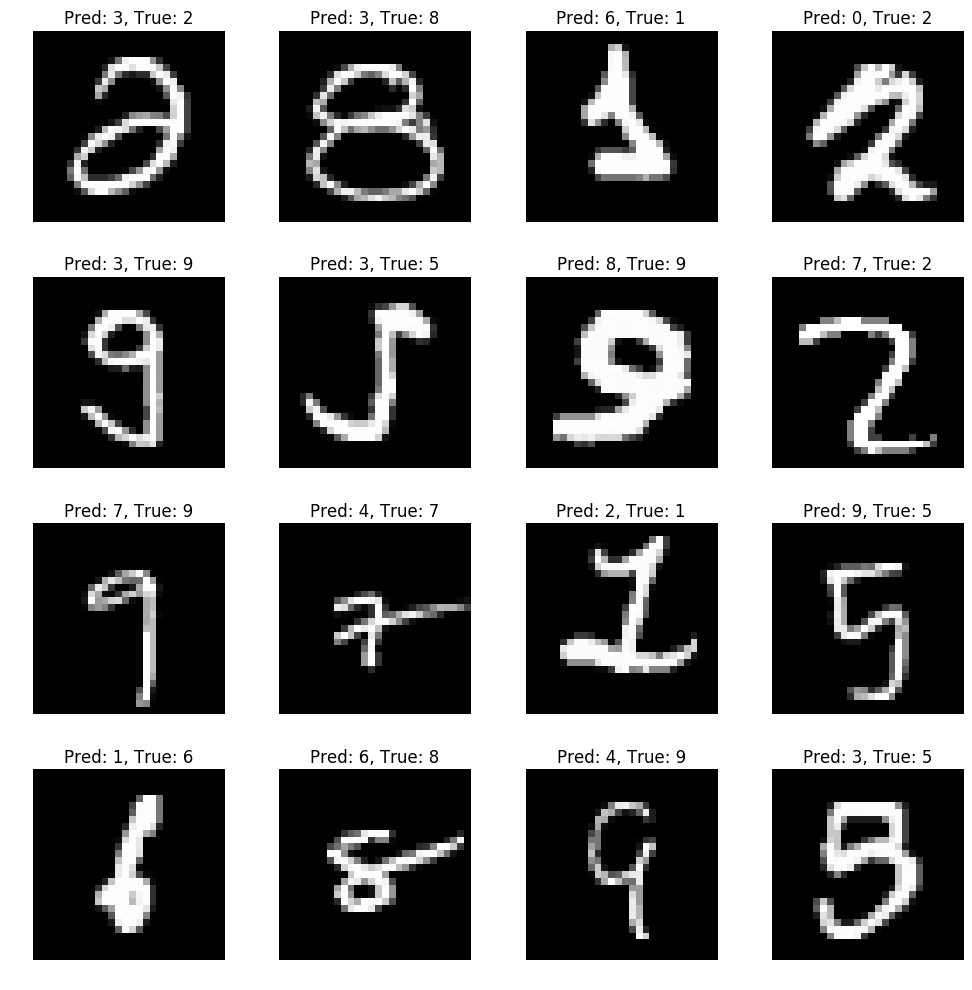

In [78]:
rand_idx = np.random.choice(error_idx, size=16, replace=False)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

i = 0
for ax in axs.reshape(-1):
    ax.set_title("Pred: %d, True: %d" % (y_rf_dropzeros_pred[rand_idx[i]], y_validation[rand_idx[i]]))
    ax.imshow(x_validation[rand_idx[i]].reshape(28,28), cmap=plt.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
plt.tight_layout()    
plt.show()

Typically, we'll find some cases where the handwriting is poor or the digit has a wierd orientation, but many of these cases don't present a true challenge to a human.  

In future examination of the MNIST digits, we'll try to see if different models have different amounts of success at improving the types of errors that Random Forest is making.

## Conclusion

Hopefully this exercise has given you good ideas of how to plan and execute your own machine learning projects, whether you find a dataset on kaggle or have a work project ahead.  In general, you will need to apply additional tools to any new dataset, especially if it came from a real-world source and has missing values, misencodings, etc., i.e. is "messy."
But the approach described here covers many important aspects such as:

1. Using pandas to load the data into python and begin exploratory data analysis tools, including matplotlib plots.

2. Converting dataframes into appropriate design matrix and response vectors for use in standard scikit-learn machine learning tools.

3. Choosing a validation scheme and using scikit-learn functions to define training and validation sets that allow you to test different models against one another.

4. Using cross-validation, random search and grid search to determine near-optimal values for the hyperparameters of a machine learning model.

5. Executing training and validation steps for different models, to try to find out how transformations of the data and choice of models affects the quality of predictions.